  utm_source utm_campaign             http_referer  sessions
0    bsearch        brand  https://www.bsearch.com         7
1    gsearch        brand  https://www.gsearch.com        26
2    gsearch     nonbrand  https://www.gsearch.com      3613


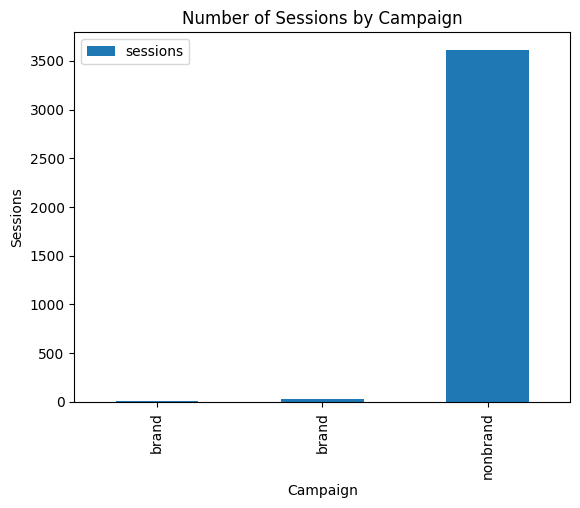

In [95]:
# Finding top traffic source
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV và chỉ định các cột cần đưa vào DataFrame
data = pd.read_csv('d:\SQL Maven\Website_sessions.csv', usecols=['utm_source','created_at', 'utm_campaign', 'http_referer', 'website_session_id'])

# Lọc dữ liệu theo các điều kiện
data = data[(data['created_at'] < '2012-04-12')]

# Nhóm và tính toán số lượng sessions
data = data.groupby(['utm_source', 'utm_campaign', 'http_referer']).agg({'website_session_id': 'nunique'}).reset_index()
data= data.rename(columns={'website_session_id': 'sessions'})
# Hiển thị kết quả
print(data)
# Vẽ biểu đồ cột
data.plot(kind='bar', x='utm_campaign', y='sessions')
plt.xlabel('Campaign')
plt.ylabel('Sessions')
plt.title('Number of Sessions by Campaign')
plt.show()


In [ ]:
# Ta có thể thấy rằng trang web được tìm thông qua trình tìm kiếm "gsearch" (không phải từ quảng cáo)
# và không liên quan đến thương hiệu có số lượng truy cập lớn nhất, nhưng chúng ta cần tìm hiểu xem nếu lượng truy cập 
# này mong lại doanh thu là bao nhiêu dựa vào tỉ lệ chuyển đổi 

In [2]:
import pandas as pd
website_sessions = pd.read_csv("d:\SQL Maven\Website_sessions.csv")
orders = pd.read_csv("d:\SQL Maven\Orders.csv")
data = pd.merge(website_sessions, orders, on = 'website_session_id',how = 'left')
data = data[(data['created_at_x'] < '2012-04-14')
            &(data['utm_source'] == 'gsearch')
            &(data['utm_campaign'] == 'nonbrand')]
sessions = data['website_session_id'].nunique()
orders = data['order_id'].count()
session_to_order_conv_rt = (orders/sessions)*100
data = pd.DataFrame({
    'sessions': [sessions],
    'orders': [orders],
    'session_to_order_conv_rt': [session_to_order_conv_rt]})
data

,sessions,orders,session_to_order_conv_rt
0,3895,112,2.875481


In [ ]:
# Tỉ lệ chuyển đổi khá thấp (2,8%), điều này có nghĩa là chúng ta nên giảm chi phí cho chiến dịch này vì chúng không hiệu quả
# chúng ta sẽ xem xét tác động của việc giảm chi phí sẽ có ảnh hưởng như thế nào.

AttributeError: module 'matplotlib.pyplot' has no attribute 'mark'

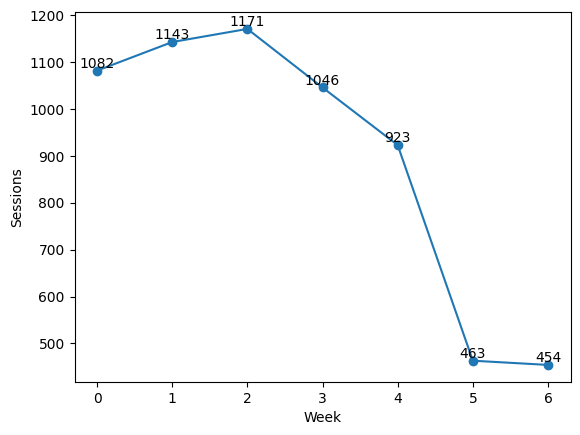

In [1]:
import pandas as pd
data= pd.read_csv("d:\SQL Maven\Website_sessions.csv")
data['created_at'] =pd.to_datetime(data['created_at'])
data = data[
    (data['created_at'] < '2012-05-10')&
    (data['utm_source'] == 'gsearch')&
    (data['utm_campaign'] == 'nonbrand')
]
data = data.groupby([data['created_at'].dt.year, data['created_at'].dt.weekday])
data = data.agg({'created_at': 'min', 'website_session_id': 'nunique'})
data.columns = ['week_start', 'sessions']
data = data.reset_index(drop = True)
data
# Vẽ biểu đồ 
import matplotlib.pyplot as plt
# Vẽ biểu đồ đường
plt.plot(data.index, data['sessions'], marker = 'o')
for i, session_count in enumerate(data['sessions']):
    plt.text(data.index[i], session_count, str(session_count), ha='center', va='bottom')
# Đặt nhãn cho trục x và trục y
plt.xlabel('Week')
plt.ylabel('Sessions')
plt.mark
# Đặt tiêu đề cho biểu đồ
plt.title('Gsearch volume trend')
# Hiển thị biểu đồ
plt.show()


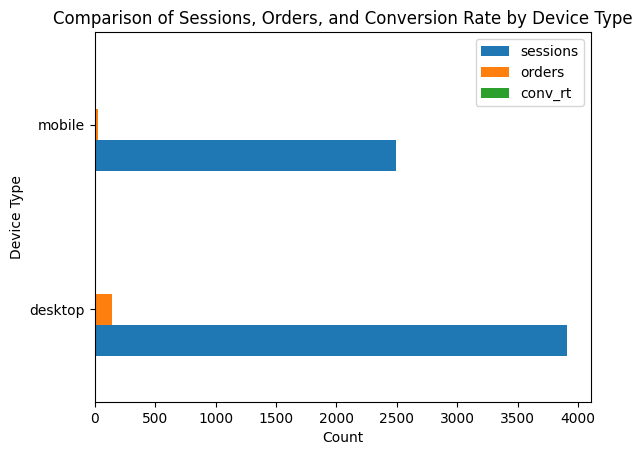

In [24]:
# Bid optimization for for Paid Traffic 
import pandas as pd 
import matplotlib.pyplot as plt
website_sessions = pd.read_csv('d:\SQL Maven\Website_sessions.csv')
orders = pd.read_csv('d:\SQL Maven\Orders.csv')
data = pd.merge(website_sessions, orders, on = 'website_session_id', how= 'left' )
# Chuyển về datetime
data['created_at_x'] = pd.to_datetime(data['created_at_x'])
# Điều kiện Where(SQL)->? Python
data = data[
    (data['created_at_x'] <'2012-05-11') &
    (data['utm_source'] == 'gsearch') &
    (data['utm_campaign'] =='nonbrand')
]
# Condition GroupBy(SQL) -> GroupBy(Python)
data = data.groupby('device_type').agg(
    sessions=('website_session_id', 'nunique'),
    orders=('order_id', 'nunique')
)
data['conv_rt'] = data['orders'] / data['sessions']
# Vẽ biểu đồ cột
ax = data.plot(kind='barh', y=['sessions', 'orders', 'conv_rt'], rot=0)
plt.xlabel('Count')
plt.ylabel('Device Type')
plt.title('Comparison of Sessions, Orders, and Conversion Rate by Device Type')
plt.legend()
plt.show()


In [1]:
# Máy tính để bàn hoạt động tốt hơn di động và chúng ta không nên chạy các lệnh đặt giá tương tự cho cả lưu lượng truy 
#cập trên máy tính và di động trong các chiến dịch quảng cáo trả tiền. Các nền tảng mà chúng ta đang đấu giá sẽ cung cấp 
#cho chúng ta khả năng phân biệt lệnh đặt giá dựa trên loại thiết bị. Vì vậy, Tom sẽ tăng lệnh đặt giá cho lưu lượng truy 
#cập trên máy tính để bàn cụ thể vì nó hoạt động tốt hơn nhiều.

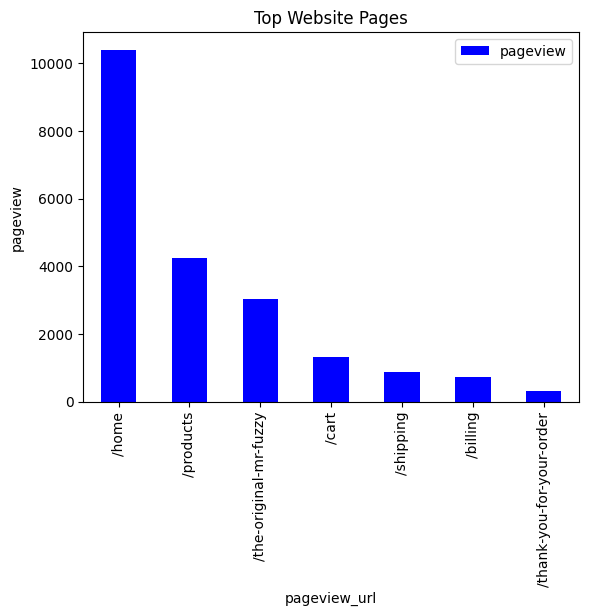

In [15]:
# TOP WEBSITE PAGES
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('d:\SQL Maven\Website_Pageviews.csv')
data['created_at'] = pd.to_datetime(data['created_at'])
data = data[data['created_at']<'2012-06-09']
data = data.groupby('pageview_url').agg(pageview=('website_session_id','nunique'))
data=data.sort_values(by ='pageview', ascending= False)
data
data = data.reset_index()
data.plot(kind='bar', x='pageview_url', y='pageview',color = 'blue')
plt.xlabel('pageview_url')
plt.ylabel('pageview')  
plt.title('Top Website Pages')
plt.show()


In [19]:
# Top entry page 
import pandas as pd
data1 = pd.read_csv('d:\SQL Maven\Website_Pageviews.csv')
website_pageviews = pd.read_csv('d:\SQL Maven\Website_Pageviews.csv')
data1['created_at'] = pd.to_datetime(data1['created_at'])
data1 = data1[data1['created_at']<'2012-06-12']
data1 = data1.groupby('website_session_id').agg(website_pageview_id = ('website_pageview_id','min'))
data1 = data1.reset_index()
data =pd.merge(website_pageviews, data1, on ='website_pageview_id',how = 'left')
data = data.groupby(['pageview_url']).agg(session_hitting_page = ('website_session_id_y','nunique'))
data = data.reset_index()
data = data[data['pageview_url'] == '/home']
data

,pageview_url,session_hitting_page
3,/home,10714


Step 1: Find the first website_pageview_id for relevant sessions.

Step 2: Identify the landing page of each session. 

Step 3: Counting pageviews for each session, to identify 'bounces'

Step 4: Summarizing total sessions and bounced sessions. 

In [61]:
import pandas as pd
website_pageviews = pd.read_csv('d:\SQL Maven\Website_Pageviews.csv')
# create first_pageview
website_pageviews['created_at']=pd.to_datetime(website_pageviews['created_at'])
first_pageview = website_pageviews[website_pageviews['created_at'] <'2012-06-14']
first_pageview = first_pageview.groupby('website_session_id').agg(website_pageview_id = ('website_pageview_id','min'))
first_pageview = first_pageview.reset_index()
# create temporary table session_w_home_landing_page
session_w_home_landing_page = pd.merge(first_pageview, website_pageviews, on = 'website_pageview_id', how = 'left')
session_w_home_landing_page= session_w_home_landing_page[session_w_home_landing_page['pageview_url']=='/home']
session_w_home_landing_page =session_w_home_landing_page.rename(columns={'website_session_id_y':'website_session_id','pageview_url':'landing_page'})
# create temporary table bounced_sessions
bounced_sessions = pd.merge(session_w_home_landing_page, website_pageviews, on = 'website_session_id', how ='left')
bounced_sessions = bounced_sessions.groupby(['website_session_id','landing_page']).agg(count_of_pages_viewed=('website_pageview_id_y', 'count')).reset_index()
bounced_sessions = bounced_sessions.loc[bounced_sessions['count_of_pages_viewed']==1]

# Final step
total_sessions = session_w_home_landing_page['website_session_id'].nunique()
bounced_sessions = bounced_sessions['website_session_id'].nunique()
bounced_rate = bounced_sessions / total_sessions
result = pd.DataFrame({'total_sessions':[total_sessions],'bounced_sessions':[bounced_sessions],'bounced_rate':[bounced_rate]})
result

,total_sessions,bounced_sessions,bounced_rate
0,11048,6538,0.591781
